# TP Clasificacion de Imagenes del dataset Fashion mnist.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import KFold
import time
import matplotlib as plt
from random import randint
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from random import shuffle
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
import time
from sklearn.manifold import TSNE
from sklearn.decomposition import KernelPCA

In [2]:
data_dir='../data'
df_train = pd.read_csv("../data/fashion-mnist_train.csv")
df_test = pd.read_csv("../data/fashion-mnist_test.csv")

In [4]:
print(df_train.shape)
print(df_test.shape)

(60000, 785)
(10000, 785)


In [5]:
df_train_reduced = df_train[:2000]

In [3]:

# Uso values para mandar todo a arrays de numpy
X_train = df_train[df_train.columns[1:]].values
y_train = df_train["label"].values.reshape(-1, 1)

X_test = df_test[df_test.columns[1:]].values
y_test = df_test["label"].values.reshape(-1, 1)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 784) (60000, 1)
(10000, 784) (10000, 1)


In [5]:
categorias = ['top', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

#0 T-shirt/top
#1 Trouser
#2 Pullover
#3 Dress
#4 Coat
#5 Sandal
#6 Shirt
#7 Sneaker
#8 Bag
#9 Ankle boot


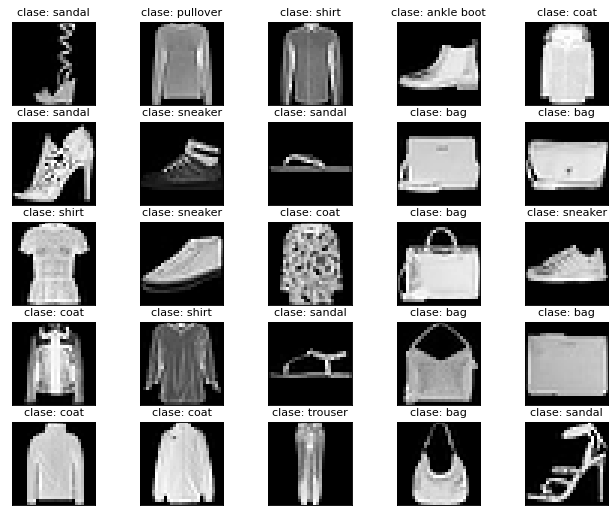

<Figure size 432x288 with 0 Axes>

In [5]:

images = []

for i in range(len(X_train)):
    images.append(X_train[i].reshape(28, 28))


figure(figsize=(10, 8), dpi=80)
for i in range(25):
    j = np.random.randint(0, len(images))
    plt.subplot(5,5,i+1) 
    plt.imshow(images[j], interpolation='none', cmap="gray")
    plt.title("clase: {}".format(categorias[y_train[j][0]]), fontsize = 10) 
    plt.xticks([])
    plt.yticks([])
plt.show()

plt.savefig("graficos/data_examples.svg");

In [5]:
# Cargo los datos

from keras.datasets import mnist,fashion_mnist

(X_train_raw, y_train), (X_test_raw, y_test) = fashion_mnist.load_data()  # cargo los dataset de entrenamiento y testeo

# reshapeamos para obtener un vector de 784 elementos (features) por cada imagen (samples)
X_train = X_train_raw.reshape(60000, -1) # no tocamos el numero de samples, 60000, pero reshapeamos las demas dimensiones
X_test = X_test_raw.reshape(10000, -1) # no tocamos el numero de samples, 60000, pero reshapeamos las demas dimensiones

X_train = X_train.astype('float32') # transformamos el tipo de datos a "float32"
X_test = X_test.astype('float32') # transformamos el tipo de datos a "float32"

# normalizamos por el maximo valor que pueden tener los pixels para que los valores queden entre 0 y 1
X_train = X_train/255.0
X_test = X_test/255.0

# print the final input shape ready for training
print("Matriz de entrenamiento shape", X_train.shape)
print("Matriz de testeo shape", X_test.shape)

Using TensorFlow backend.


Matriz de entrenamiento shape (60000, 784)
Matriz de testeo shape (10000, 784)


# Modelo: construccion del modelo usando Knn

In [6]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from random import shuffle
from sklearn.metrics import confusion_matrix

acc = [] # donde van a ir a parar las accuracies
indices = np.arange(len(y_test)) # vector de indices

clf = KNeighborsClassifier(n_neighbors=5) # clasificador
clf.fit(X_train, y_train) # una sola vez


for n in np.arange(0,10): # itero 

  print(n) # para los ansiosos
  shuffle(indices) # permuto el vector de indices
  X_KNN = X_test[indices[0:100],:] # los primeros 100 del vector de indices
  y_KNN = y_test[indices[0:100]]

  y_pred = clf.predict(X_KNN) # predigo etiquetas
  accuracy =  accuracy_score(y_pred,y_KNN) # acuraccy
  acc.append(accuracy) # guardo

print('Accuracy promedio:', np.mean(accuracy)) # el promedio


0
1
2
3
4
5
6
7
8
9
Accuracy promedio: 0.83


In [9]:
#y_pred = clf.predict(X_test)

#confusion_matrix(y_test, y_pred)


array([[855,   1,  17,  16,   3,   1, 100,   1,   6,   0],
       [  8, 968,   4,  12,   4,   0,   3,   0,   1,   0],
       [ 24,   2, 819,  11,  75,   0,  69,   0,   0,   0],
       [ 41,   8,  15, 860,  39,   0,  34,   0,   3,   0],
       [  2,   1, 126,  26, 773,   0,  71,   0,   1,   0],
       [  1,   0,   0,   0,   0, 822,   5,  96,   1,  75],
       [176,   1, 132,  23,  80,   0, 575,   0,  13,   0],
       [  0,   0,   0,   0,   0,   3,   0, 961,   0,  36],
       [  2,   0,  10,   4,   7,   0,  16,   7, 953,   1],
       [  0,   0,   0,   0,   0,   2,   1,  29,   0, 968]])

In [10]:
y_pred.shape
y_KNN
#indices

array([7, 5, 8, 6, 8, 5, 0, 8, 2, 9, 5, 8, 0, 0, 9, 4, 7, 9, 9, 3, 7, 1,
       2, 4, 7, 1, 4, 6, 3, 9, 3, 8, 9, 9, 4, 1, 1, 7, 5, 1, 2, 6, 7, 9,
       3, 5, 5, 1, 6, 1, 0, 1, 0, 4, 1, 8, 3, 6, 1, 0, 8, 3, 6, 2, 3, 7,
       7, 7, 0, 2, 6, 8, 5, 2, 5, 0, 7, 3, 0, 2, 0, 1, 7, 1, 1, 1, 1, 2,
       1, 4, 7, 4, 3, 2, 4, 6, 1, 4, 4, 5], dtype=uint8)

In [11]:
exitos = indices[y_pred == y_KNN[0]] # los indices correspondientes a los casos en que le pegamos a la etiqueta
fracasos = indices[y_pred != y_KNN[0]]# los indices correspondientes a los casos en que  fallamos la etiqueta

In [12]:
len(exitos)

1094

In [13]:
print(fracasos)
print(exitos)

[1765 3957 7261 ... 6103 8923 6702]
[8922 3958 7850 ... 4800 6561  508]


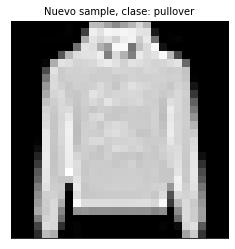

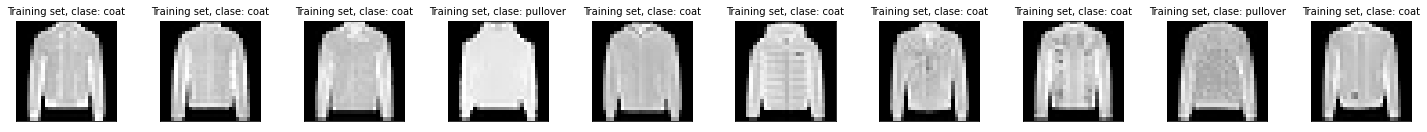

<Figure size 432x288 with 0 Axes>

In [14]:
n=exitos[10] # elijo uno de los exitos 

fig = plt.figure(figsize = (4,4))
plt.imshow(X_test_raw[n], interpolation='none', cmap="gray") # plotea la imagen correspondiente
plt.title("Nuevo sample, clase: {}".format(categorias[y_test[n]]), fontsize = 10) # pongo el titulo a los plots con el nombre de la clase a la que pertenece la imagen y seteo el tamano de letra
plt.xticks([]) # le saco los ticks en el eje X
plt.yticks([]) # le saco los ticks en el eje Y


knn = clf.kneighbors(X_test[n,:].reshape(1, -1), 10 , return_distance=False)[0] # esto me devuelve los indices de los K samples mas cercanos
fig = plt.figure(figsize = (20,20), tight_layout = True) # seteo el tamano de la figura

for n,i in enumerate(knn):
    plt.subplot(1,10,n+1) # Voy a tener una matriz de 1x10 subplots y voy llenando en la iteracion i-esima el subplot i+1
    plt.imshow(X_train_raw[i], interpolation='none', cmap="gray") # va ploteando los K samples mas cercanos
    plt.title("Training set, clase: {}".format(categorias[y_train[i]]), fontsize = 10) # pongo el titulo a los plots con el nombre de la clase a la que pertenece la imagen y seteo el tamano de letra
    plt.xticks([]) # le saco los ticks en el eje X
    plt.yticks([]) # le saco los ticks en el eje Y
plt.show()

plt.savefig("graficos/exitos_knn.svg");

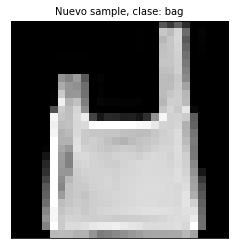

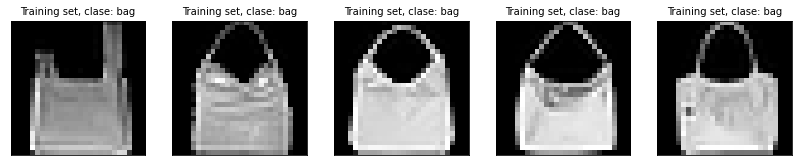

<Figure size 432x288 with 0 Axes>

In [15]:
n=fracasos[10] # elijo uno de los fracasos 

fig = plt.figure(figsize = (4,4))
plt.imshow(X_test_raw[n], interpolation='none', cmap="gray") # plotea la imagen correspondiente
plt.title("Nuevo sample, clase: {}".format(categorias[y_test[n]]), fontsize = 10) # pongo el titulo a los plots con el nombre de la clase a la que pertenece la imagen y seteo el tamano de letra
plt.xticks([]) # le saco los ticks en el eje X
plt.yticks([]) # le saco los ticks en el eje Y


knn = clf.kneighbors(X_test[n,:].reshape(1, -1) , return_distance=False)[0] # esto me devuelve los indices de los K samples mas cercanos
fig = plt.figure(figsize = (14,14)) # seteo el tamano de la figura

for n,i in enumerate(knn):
    plt.subplot(1,5,n+1) # Voy a tener una matriz de 1x5 subplots y voy llenando en la iteracion i-esima el subplot i+1
    plt.imshow(X_train_raw[i], interpolation='none', cmap="gray") # va ploteando los K samples mas cercanos
    plt.title("Training set, clase: {}".format(categorias[y_train[i]]), fontsize = 10) # pongo el titulo a los plots con el nombre de la clase a la que pertenece la imagen y seteo el tamano de letra
    plt.xticks([]) # le saco los ticks en el eje X
    plt.yticks([]) # le saco los ticks en el eje Y
plt.show()

plt.savefig("graficos/fracasos.svg");

In [3]:

SEED = 42
data = pd.read_csv("../data/fashion-mnist_train.csv")
X,y = data.drop(['label'], axis = 1), data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = SEED)

# Estudio el modelo con 1000 datos

In [9]:


data_mil = data[:1000]
X_mil,y_mil = data_mil.drop(['label'], axis = 1), data_mil['label']
X_train_mil, X_test_mil, y_train_mil, y_test_mil = train_test_split(X_mil, y_mil, test_size = 0.2, random_state = SEED)
kfold = KFold(n_splits=5, shuffle=True)

X_train_mil = X_train_mil.reset_index(drop=True)

y_train_mil.index = X_train_mil.index
performance_accuracy = []

fold_count = 1

In [79]:

accs_knn_manhattan_thousand = []
validation_times = []
for k in range(1, 201, 3):
    performance_accuracy = []
    pipe = Pipeline([('knn',KNeighborsClassifier(n_neighbors=k, p=1))])
    for (train_index, test_index) in kfold.split(X_train_mil):
        print('fold '+str(fold_count)+': ')
        print('-- training --')
        X_kfold_train, y_kfold_train = X_train_mil.iloc[train_index], y_train_mil.loc[train_index]
        X_kfold_test, y_kfold_test = X_train_mil.iloc[test_index], y_train_mil.loc[test_index]
        start = time.time()
        pipe.fit(X_kfold_train, y_kfold_train)
        y_kfold_pred = pipe.predict(X_kfold_test)
        end = time.time()
        train_time = end-start
        print(train_time)
        print('-- train ok ! --')
        perf = accuracy_score(y_kfold_test, y_kfold_pred)
        performance_accuracy.append(perf)

        fold_count = fold_count + 1
    validation_times.append((k,np.mean(train_time)))
    accs_knn_manhattan_thousand.append((k,np.mean(performance_accuracy)))
    print(np.mean(performance_accuracy))
    

fold 1: 
-- training --
0.22127938270568848
-- train ok ! --
fold 2: 
-- training --
0.22288036346435547
-- train ok ! --
fold 3: 
-- training --
0.2235877513885498
-- train ok ! --
fold 4: 
-- training --
0.22270584106445312
-- train ok ! --
fold 5: 
-- training --
0.22165489196777344
-- train ok ! --
0.70625
fold 6: 
-- training --
0.22216320037841797
-- train ok ! --
fold 7: 
-- training --
0.22324705123901367
-- train ok ! --
fold 8: 
-- training --
0.22394514083862305
-- train ok ! --
fold 9: 
-- training --
0.22171306610107422
-- train ok ! --
fold 10: 
-- training --
0.2233867645263672
-- train ok ! --
0.7449999999999999
fold 11: 
-- training --
0.22386455535888672
-- train ok ! --
fold 12: 
-- training --
0.22336602210998535
-- train ok ! --
fold 13: 
-- training --
0.23007535934448242
-- train ok ! --
fold 14: 
-- training --
0.22172236442565918
-- train ok ! --
fold 15: 
-- training --
0.22353696823120117
-- train ok ! --
0.7325
fold 16: 
-- training --
0.22436165809631348
--

0.2242908477783203
-- train ok ! --
fold 130: 
-- training --
0.22474074363708496
-- train ok ! --
0.5974999999999999
fold 131: 
-- training --
0.2239973545074463
-- train ok ! --
fold 132: 
-- training --
0.2263166904449463
-- train ok ! --
fold 133: 
-- training --
0.22771883010864258
-- train ok ! --
fold 134: 
-- training --
0.22431683540344238
-- train ok ! --
fold 135: 
-- training --
0.22487449645996094
-- train ok ! --
0.585
fold 136: 
-- training --
0.22430992126464844
-- train ok ! --
fold 137: 
-- training --
0.22492384910583496
-- train ok ! --
fold 138: 
-- training --
0.2276914119720459
-- train ok ! --
fold 139: 
-- training --
0.22565221786499023
-- train ok ! --
fold 140: 
-- training --
0.22580432891845703
-- train ok ! --
0.56125
fold 141: 
-- training --
0.2246863842010498
-- train ok ! --
fold 142: 
-- training --
0.22583270072937012
-- train ok ! --
fold 143: 
-- training --
0.22711181640625
-- train ok ! --
fold 144: 
-- training --
0.22591590881347656
-- train o

0.23055624961853027
-- train ok ! --
0.47125000000000006
fold 256: 
-- training --
0.2297224998474121
-- train ok ! --
fold 257: 
-- training --
0.23209881782531738
-- train ok ! --
fold 258: 
-- training --
0.2320263385772705
-- train ok ! --
fold 259: 
-- training --
0.2288494110107422
-- train ok ! --
fold 260: 
-- training --
0.23285818099975586
-- train ok ! --
0.46499999999999997
fold 261: 
-- training --
0.23093104362487793
-- train ok ! --
fold 262: 
-- training --
0.23166465759277344
-- train ok ! --
fold 263: 
-- training --
0.23258590698242188
-- train ok ! --
fold 264: 
-- training --
0.2283937931060791
-- train ok ! --
fold 265: 
-- training --
0.23077988624572754
-- train ok ! --
0.4625
fold 266: 
-- training --
0.2277214527130127
-- train ok ! --
fold 267: 
-- training --
0.23094582557678223
-- train ok ! --
fold 268: 
-- training --
0.23206472396850586
-- train ok ! --
fold 269: 
-- training --
0.22949743270874023
-- train ok ! --
fold 270: 
-- training --
0.23291301727

In [80]:
accs_knn_manhattan_thousand
validation_times

[(1, 0.22165489196777344),
 (4, 0.2233867645263672),
 (7, 0.22353696823120117),
 (10, 0.21776413917541504),
 (13, 0.22630548477172852),
 (16, 0.2240128517150879),
 (19, 0.22986483573913574),
 (22, 0.22612714767456055),
 (25, 0.2287449836730957),
 (28, 0.22611260414123535),
 (31, 0.22754979133605957),
 (34, 0.22634482383728027),
 (37, 0.22706818580627441),
 (40, 0.22678637504577637),
 (43, 0.22424650192260742),
 (46, 0.22487640380859375),
 (49, 0.22595763206481934),
 (52, 0.22532176971435547),
 (55, 0.22640419006347656),
 (58, 0.22549915313720703),
 (61, 0.22457480430603027),
 (64, 0.22486042976379395),
 (67, 0.22549676895141602),
 (70, 0.22683072090148926),
 (73, 0.22539305686950684),
 (76, 0.22474074363708496),
 (79, 0.22487449645996094),
 (82, 0.22580432891845703),
 (85, 0.22571420669555664),
 (88, 0.22600483894348145),
 (91, 0.22635293006896973),
 (94, 0.2266526222229004),
 (97, 0.2263188362121582),
 (100, 0.22632336616516113),
 (103, 0.2265937328338623),
 (106, 0.22914886474609375)

In [66]:
accs_knn_euclidean_thousand = []
for k in range(1, 200, 3):
    performance_accuracy = []
    pipe = Pipeline([('knn',KNeighborsClassifier(n_neighbors=k, p=2))])
    for (train_index, test_index) in kfold.split(X_train_mil):
        print('fold '+str(fold_count)+': ')
        print('-- training --')
        X_kfold_train, y_kfold_train = X_train_mil.iloc[train_index], y_train_mil.loc[train_index]
        X_kfold_test, y_kfold_test = X_train_mil.iloc[test_index], y_train_mil.loc[test_index]
        pipe.fit(X_kfold_train, y_kfold_train)
        y_kfold_pred = pipe.predict(X_kfold_test)
        print('-- train ok ! --')
        perf = accuracy_score(y_kfold_test, y_kfold_pred)
        performance_accuracy.append(perf)

        fold_count = fold_count + 1
    accs_knn_euclidean_thousand.append((k,np.mean(performance_accuracy)))
    print(np.mean(performance_accuracy))

fold 341: 
-- training --
-- train ok ! --
fold 342: 
-- training --
-- train ok ! --
fold 343: 
-- training --
-- train ok ! --
fold 344: 
-- training --
-- train ok ! --
fold 345: 
-- training --
-- train ok ! --
0.6975
fold 346: 
-- training --
-- train ok ! --
fold 347: 
-- training --
-- train ok ! --
fold 348: 
-- training --
-- train ok ! --
fold 349: 
-- training --
-- train ok ! --
fold 350: 
-- training --
-- train ok ! --
0.7300000000000001
fold 351: 
-- training --
-- train ok ! --
fold 352: 
-- training --
-- train ok ! --
fold 353: 
-- training --
-- train ok ! --
fold 354: 
-- training --
-- train ok ! --
fold 355: 
-- training --
-- train ok ! --
0.7112499999999999
fold 356: 
-- training --
-- train ok ! --
fold 357: 
-- training --
-- train ok ! --
fold 358: 
-- training --
-- train ok ! --
fold 359: 
-- training --
-- train ok ! --
fold 360: 
-- training --
-- train ok ! --
0.7075
fold 361: 
-- training --
-- train ok ! --
fold 362: 
-- training --
-- train ok ! --
fo

-- train ok ! --
fold 524: 
-- training --
-- train ok ! --
fold 525: 
-- training --
-- train ok ! --
0.58625
fold 526: 
-- training --
-- train ok ! --
fold 527: 
-- training --
-- train ok ! --
fold 528: 
-- training --
-- train ok ! --
fold 529: 
-- training --
-- train ok ! --
fold 530: 
-- training --
-- train ok ! --
0.56875
fold 531: 
-- training --
-- train ok ! --
fold 532: 
-- training --
-- train ok ! --
fold 533: 
-- training --
-- train ok ! --
fold 534: 
-- training --
-- train ok ! --
fold 535: 
-- training --
-- train ok ! --
0.5774999999999999
fold 536: 
-- training --
-- train ok ! --
fold 537: 
-- training --
-- train ok ! --
fold 538: 
-- training --
-- train ok ! --
fold 539: 
-- training --
-- train ok ! --
fold 540: 
-- training --
-- train ok ! --
0.57125
fold 541: 
-- training --
-- train ok ! --
fold 542: 
-- training --
-- train ok ! --
fold 543: 
-- training --
-- train ok ! --
fold 544: 
-- training --
-- train ok ! --
fold 545: 
-- training --
-- train ok

In [67]:
accs_knn_euclidean_thousand

[(1, 0.6975),
 (4, 0.7300000000000001),
 (7, 0.7112499999999999),
 (10, 0.7075),
 (13, 0.7150000000000001),
 (16, 0.7150000000000001),
 (19, 0.7162499999999999),
 (22, 0.6950000000000001),
 (25, 0.69625),
 (28, 0.68625),
 (31, 0.7025),
 (34, 0.675),
 (37, 0.6937500000000001),
 (40, 0.66625),
 (43, 0.665),
 (46, 0.6475),
 (49, 0.64625),
 (52, 0.65),
 (55, 0.65375),
 (58, 0.65),
 (61, 0.6125),
 (64, 0.6250000000000001),
 (67, 0.6175),
 (70, 0.6225),
 (73, 0.625),
 (76, 0.6075),
 (79, 0.605),
 (82, 0.6112500000000001),
 (85, 0.6125),
 (88, 0.59375),
 (91, 0.6025),
 (94, 0.58375),
 (97, 0.6125),
 (100, 0.58125),
 (103, 0.58125),
 (106, 0.59625),
 (109, 0.58625),
 (112, 0.56875),
 (115, 0.5774999999999999),
 (118, 0.57125),
 (121, 0.54625),
 (124, 0.55625),
 (127, 0.5487500000000001),
 (130, 0.5587500000000001),
 (133, 0.545),
 (136, 0.5549999999999999),
 (139, 0.5112500000000001),
 (142, 0.49874999999999997),
 (145, 0.51875),
 (148, 0.5237499999999999),
 (151, 0.5137499999999999),
 (154, 0

In [68]:
accs_knn_chebyshev_thousand = []
for k in range(1, 200, 3):
    performance_accuracy = []
    pipe = Pipeline([('knn',KNeighborsClassifier(n_neighbors=k, metric='chebyshev'))])
    for (train_index, test_index) in kfold.split(X_train_mil):
        print('fold '+str(fold_count)+': ')
        print('-- training --')
        X_kfold_train, y_kfold_train = X_train_mil.iloc[train_index], y_train_mil.loc[train_index]
        X_kfold_test, y_kfold_test = X_train_mil.iloc[test_index], y_train_mil.loc[test_index]
        pipe.fit(X_kfold_train, y_kfold_train)
        y_kfold_pred = pipe.predict(X_kfold_test)
        print('-- train ok ! --')
        perf = accuracy_score(y_kfold_test, y_kfold_pred)
        performance_accuracy.append(perf)

        fold_count = fold_count + 1
    accs_knn_chebyshev_thousand.append((k,np.mean(performance_accuracy)))
    print(np.mean(performance_accuracy))

fold 676: 
-- training --
-- train ok ! --
fold 677: 
-- training --
-- train ok ! --
fold 678: 
-- training --
-- train ok ! --
fold 679: 
-- training --
-- train ok ! --
fold 680: 
-- training --
-- train ok ! --
0.48250000000000004
fold 681: 
-- training --
-- train ok ! --
fold 682: 
-- training --
-- train ok ! --
fold 683: 
-- training --
-- train ok ! --
fold 684: 
-- training --
-- train ok ! --
fold 685: 
-- training --
-- train ok ! --
0.49000000000000005
fold 686: 
-- training --
-- train ok ! --
fold 687: 
-- training --
-- train ok ! --
fold 688: 
-- training --
-- train ok ! --
fold 689: 
-- training --
-- train ok ! --
fold 690: 
-- training --
-- train ok ! --
0.47124999999999995
fold 691: 
-- training --
-- train ok ! --
fold 692: 
-- training --
-- train ok ! --
fold 693: 
-- training --
-- train ok ! --
fold 694: 
-- training --
-- train ok ! --
fold 695: 
-- training --
-- train ok ! --
0.47000000000000003
fold 696: 
-- training --
-- train ok ! --
fold 697: 
-- tra

-- train ok ! --
0.33125
fold 856: 
-- training --
-- train ok ! --
fold 857: 
-- training --
-- train ok ! --
fold 858: 
-- training --
-- train ok ! --
fold 859: 
-- training --
-- train ok ! --
fold 860: 
-- training --
-- train ok ! --
0.335
fold 861: 
-- training --
-- train ok ! --
fold 862: 
-- training --
-- train ok ! --
fold 863: 
-- training --
-- train ok ! --
fold 864: 
-- training --
-- train ok ! --
fold 865: 
-- training --
-- train ok ! --
0.3475
fold 866: 
-- training --
-- train ok ! --
fold 867: 
-- training --
-- train ok ! --
fold 868: 
-- training --
-- train ok ! --
fold 869: 
-- training --
-- train ok ! --
fold 870: 
-- training --
-- train ok ! --
0.33875
fold 871: 
-- training --
-- train ok ! --
fold 872: 
-- training --
-- train ok ! --
fold 873: 
-- training --
-- train ok ! --
fold 874: 
-- training --
-- train ok ! --
fold 875: 
-- training --
-- train ok ! --
0.34875
fold 876: 
-- training --
-- train ok ! --
fold 877: 
-- training --
-- train ok ! --


In [69]:
accs_knn_chebyshev_thousand

[(1, 0.48250000000000004),
 (4, 0.49000000000000005),
 (7, 0.47124999999999995),
 (10, 0.47000000000000003),
 (13, 0.45125000000000004),
 (16, 0.43624999999999997),
 (19, 0.43125),
 (22, 0.43499999999999994),
 (25, 0.42625),
 (28, 0.4225),
 (31, 0.41500000000000004),
 (34, 0.41875),
 (37, 0.40750000000000003),
 (40, 0.40625),
 (43, 0.39875),
 (46, 0.4225),
 (49, 0.4025),
 (52, 0.38875000000000004),
 (55, 0.38625000000000004),
 (58, 0.38125),
 (61, 0.395),
 (64, 0.3625),
 (67, 0.37625),
 (70, 0.36375),
 (73, 0.3662500000000001),
 (76, 0.35625000000000007),
 (79, 0.36375),
 (82, 0.36375),
 (85, 0.375),
 (88, 0.35374999999999995),
 (91, 0.35624999999999996),
 (94, 0.36499999999999994),
 (97, 0.3375),
 (100, 0.32875),
 (103, 0.37875000000000003),
 (106, 0.33125),
 (109, 0.335),
 (112, 0.3475),
 (115, 0.33875),
 (118, 0.34875),
 (121, 0.35625),
 (124, 0.33249999999999996),
 (127, 0.3325),
 (130, 0.33875),
 (133, 0.33625000000000005),
 (136, 0.35124999999999995),
 (139, 0.33),
 (142, 0.33625

# Modelo tomando cinco mil entradas del conjunto de entrenamiento

In [2]:
from sklearn.model_selection import KFold

data_cinco_mil = data[:5000]
X_cinco_mil,y_cinco_mil = data_cinco_mil.drop(['label'], axis = 1), data_cinco_mil['label']
X_train_cinco_mil, X_test_cinco_mil, y_train_cinco_mil, y_test_cinco_mil = train_test_split(X_cinco_mil, y_cinco_mil, test_size = 0.2, random_state = SEED)
kfold = KFold(n_splits=5, shuffle=True)

X_train_cinco_mil = X_train_cinco_mil.reset_index(drop=True)

y_train_cinco_mil.index = X_train_cinco_mil.index
performance_accuracy = []
chebyshev
fold_count = 1

NameError: name 'data' is not defined

In [71]:
accs_knn_manhattan_five_thousand = []
for k in range(1, 201, 3):
    performance_accuracy = []
    pipe = Pipeline([('knn',KNeighborsClassifier(n_neighbors=k, p=1))])
    for (train_index, test_index) in kfold.split(X_train_cinco_mil):
        print('fold '+str(fold_count)+': ')
        print('-- training --')
        X_kfold_train, y_kfold_train = X_train_cinco_mil.iloc[train_index], y_train_cinco_mil.loc[train_index]
        X_kfold_test, y_kfold_test = X_train_cinco_mil.iloc[test_index], y_train_cinco_mil.loc[test_index]
        pipe.fit(X_kfold_train, y_kfold_train)
        y_kfold_pred = pipe.predict(X_kfold_test)
        print('-- train ok ! --')
        perf = accuracy_score(y_kfold_test, y_kfold_pred)
        performance_accuracy.append(perf)

        fold_count = fold_count + 1
    accs_knn_manhattan_five_thousand.append((k,np.mean(performance_accuracy)))
    print(np.mean(performance_accuracy))


fold 1: 
-- training --
-- train ok ! --
fold 2: 
-- training --
-- train ok ! --
fold 3: 
-- training --
-- train ok ! --
fold 4: 
-- training --
-- train ok ! --
fold 5: 
-- training --
-- train ok ! --
0.7889999999999999
fold 6: 
-- training --
-- train ok ! --
fold 7: 
-- training --
-- train ok ! --
fold 8: 
-- training --
-- train ok ! --
fold 9: 
-- training --
-- train ok ! --
fold 10: 
-- training --
-- train ok ! --
0.7987500000000001
fold 11: 
-- training --
-- train ok ! --
fold 12: 
-- training --
-- train ok ! --
fold 13: 
-- training --
-- train ok ! --
fold 14: 
-- training --
-- train ok ! --
fold 15: 
-- training --
-- train ok ! --
0.8002500000000001
fold 16: 
-- training --
-- train ok ! --
fold 17: 
-- training --
-- train ok ! --
fold 18: 
-- training --
-- train ok ! --
fold 19: 
-- training --
-- train ok ! --
fold 20: 
-- training --
-- train ok ! --
0.79125
fold 21: 
-- training --
-- train ok ! --
fold 22: 
-- training --
-- train ok ! --
fold 23: 
-- trainin

-- train ok ! --
fold 185: 
-- training --
-- train ok ! --
0.7405
fold 186: 
-- training --
-- train ok ! --
fold 187: 
-- training --
-- train ok ! --
fold 188: 
-- training --
-- train ok ! --
fold 189: 
-- training --
-- train ok ! --
fold 190: 
-- training --
-- train ok ! --
0.73925
fold 191: 
-- training --
-- train ok ! --
fold 192: 
-- training --
-- train ok ! --
fold 193: 
-- training --
-- train ok ! --
fold 194: 
-- training --
-- train ok ! --
fold 195: 
-- training --
-- train ok ! --
0.7332500000000002
fold 196: 
-- training --
-- train ok ! --
fold 197: 
-- training --
-- train ok ! --
fold 198: 
-- training --
-- train ok ! --
fold 199: 
-- training --
-- train ok ! --
fold 200: 
-- training --
-- train ok ! --
0.735
fold 201: 
-- training --
-- train ok ! --
fold 202: 
-- training --
-- train ok ! --
fold 203: 
-- training --
-- train ok ! --
fold 204: 
-- training --
-- train ok ! --
fold 205: 
-- training --
-- train ok ! --
0.735
fold 206: 
-- training --
-- train

In [72]:
accs_knn_manhattan_five_thousand

[(1, 0.7889999999999999),
 (4, 0.7987500000000001),
 (7, 0.8002500000000001),
 (10, 0.79125),
 (13, 0.79025),
 (16, 0.79075),
 (19, 0.79275),
 (22, 0.78825),
 (25, 0.7825),
 (28, 0.78375),
 (31, 0.7875),
 (34, 0.7802499999999999),
 (37, 0.77925),
 (40, 0.77675),
 (43, 0.7749999999999999),
 (46, 0.7765),
 (49, 0.772),
 (52, 0.7705),
 (55, 0.7665000000000001),
 (58, 0.76925),
 (61, 0.7649999999999999),
 (64, 0.7609999999999999),
 (67, 0.7645),
 (70, 0.7602499999999999),
 (73, 0.7567499999999999),
 (76, 0.75375),
 (79, 0.75325),
 (82, 0.75025),
 (85, 0.7535000000000001),
 (88, 0.74775),
 (91, 0.7445),
 (94, 0.748),
 (97, 0.74675),
 (100, 0.74375),
 (103, 0.7450000000000001),
 (106, 0.7422500000000001),
 (109, 0.7405),
 (112, 0.73925),
 (115, 0.7332500000000002),
 (118, 0.735),
 (121, 0.735),
 (124, 0.7384999999999999),
 (127, 0.734),
 (130, 0.7315),
 (133, 0.7285),
 (136, 0.73275),
 (139, 0.7265),
 (142, 0.7300000000000001),
 (145, 0.72325),
 (148, 0.72325),
 (151, 0.7264999999999999),
 (

In [73]:
accs_knn_euclidean_five_thousand = []
for k in range(1, 201, 3):
    performance_accuracy = []
    pipe = Pipeline([('knn',KNeighborsClassifier(n_neighbors=k, p=2))])
    for (train_index, test_index) in kfold.split(X_train_cinco_mil):
        print('fold '+str(fold_count)+': ')
        print('-- training --')
        X_kfold_train, y_kfold_train = X_train_cinco_mil.iloc[train_index], y_train_cinco_mil.loc[train_index]
        X_kfold_test, y_kfold_test = X_train_cinco_mil.iloc[test_index], y_train_cinco_mil.loc[test_index]
        pipe.fit(X_kfold_train, y_kfold_train)
        y_kfold_pred = pipe.predict(X_kfold_test)
        print('-- train ok ! --')
        perf = accuracy_score(y_kfold_test, y_kfold_pred)
        performance_accuracy.append(perf)

        fold_count = fold_count + 1
    accs_knn_euclidean_five_thousand.append((k,np.mean(performance_accuracy)))
    print(np.mean(performance_accuracy))

fold 336: 
-- training --
-- train ok ! --
fold 337: 
-- training --
-- train ok ! --
fold 338: 
-- training --
-- train ok ! --
fold 339: 
-- training --
-- train ok ! --
fold 340: 
-- training --
-- train ok ! --
0.7875
fold 341: 
-- training --
-- train ok ! --
fold 342: 
-- training --
-- train ok ! --
fold 343: 
-- training --
-- train ok ! --
fold 344: 
-- training --
-- train ok ! --
fold 345: 
-- training --
-- train ok ! --
0.7929999999999999
fold 346: 
-- training --
-- train ok ! --
fold 347: 
-- training --
-- train ok ! --
fold 348: 
-- training --
-- train ok ! --
fold 349: 
-- training --
-- train ok ! --
fold 350: 
-- training --
-- train ok ! --
0.7877500000000001
fold 351: 
-- training --
-- train ok ! --
fold 352: 
-- training --
-- train ok ! --
fold 353: 
-- training --
-- train ok ! --
fold 354: 
-- training --
-- train ok ! --
fold 355: 
-- training --
-- train ok ! --
0.7935000000000001
fold 356: 
-- training --
-- train ok ! --
fold 357: 
-- training --
-- trai

-- train ok ! --
fold 518: 
-- training --
-- train ok ! --
fold 519: 
-- training --
-- train ok ! --
fold 520: 
-- training --
-- train ok ! --
0.73525
fold 521: 
-- training --
-- train ok ! --
fold 522: 
-- training --
-- train ok ! --
fold 523: 
-- training --
-- train ok ! --
fold 524: 
-- training --
-- train ok ! --
fold 525: 
-- training --
-- train ok ! --
0.7332500000000001
fold 526: 
-- training --
-- train ok ! --
fold 527: 
-- training --
-- train ok ! --
fold 528: 
-- training --
-- train ok ! --
fold 529: 
-- training --
-- train ok ! --
fold 530: 
-- training --
-- train ok ! --
0.734
fold 531: 
-- training --
-- train ok ! --
fold 532: 
-- training --
-- train ok ! --
fold 533: 
-- training --
-- train ok ! --
fold 534: 
-- training --
-- train ok ! --
fold 535: 
-- training --
-- train ok ! --
0.733
fold 536: 
-- training --
-- train ok ! --
fold 537: 
-- training --
-- train ok ! --
fold 538: 
-- training --
-- train ok ! --
fold 539: 
-- training --
-- train ok ! -

In [74]:
accs_knn_euclidean_five_thousand

[(1, 0.7875),
 (4, 0.7929999999999999),
 (7, 0.7877500000000001),
 (10, 0.7935000000000001),
 (13, 0.788),
 (16, 0.782),
 (19, 0.7835),
 (22, 0.782),
 (25, 0.7772500000000001),
 (28, 0.7737499999999999),
 (31, 0.77175),
 (34, 0.7729999999999999),
 (37, 0.7642499999999999),
 (40, 0.76625),
 (43, 0.76325),
 (46, 0.7659999999999999),
 (49, 0.75825),
 (52, 0.7627499999999999),
 (55, 0.7595),
 (58, 0.755),
 (61, 0.7579999999999999),
 (64, 0.75575),
 (67, 0.752),
 (70, 0.75525),
 (73, 0.7505000000000001),
 (76, 0.7477499999999999),
 (79, 0.75225),
 (82, 0.75),
 (85, 0.74325),
 (88, 0.74475),
 (91, 0.7394999999999999),
 (94, 0.7435),
 (97, 0.7434999999999999),
 (100, 0.7395),
 (103, 0.741),
 (106, 0.73525),
 (109, 0.73525),
 (112, 0.7332500000000001),
 (115, 0.734),
 (118, 0.733),
 (121, 0.729),
 (124, 0.7302500000000001),
 (127, 0.73),
 (130, 0.73075),
 (133, 0.7250000000000001),
 (136, 0.7304999999999999),
 (139, 0.7285),
 (142, 0.7252500000000001),
 (145, 0.72675),
 (148, 0.724499999999999

# Entreno el modelo usando todos los datos

In [3]:
SEED = 42
data = pd.read_csv("../data/fashion-mnist_train.csv")
X,y = data.drop(['label'], axis = 1), data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = SEED)
kfold = KFold(n_splits=5, shuffle=True)

X_train = X_train.reset_index(drop=True)

y_train.index = X_train.index
performance_accuracy = []

fold_count = 1

In [4]:
X_train.shape

(48000, 784)

In [5]:
accs_knn_manhattan = []
validation_times_manhattan = []
accs_knn_euclidean = []
validation_times_euclidean = []
for k in range(1, 6, 5):
    performance_accuracy_manhattan = []
    performance_accuracy_euclidean = []
    times_manhattan = []
    times_euclidean = []
    pipe1 = Pipeline([('knn',KNeighborsClassifier(n_neighbors=k, p=1))])
    pipe2 = Pipeline([('knn',KNeighborsClassifier(n_neighbors=k, p=2))])
    for (train_index, test_index) in kfold.split(X_train):
        
        print('fold '+str(fold_count)+': ')
        print('-- training manhattan--')
        X_kfold_train, y_kfold_train = X_train.iloc[train_index], y_train.loc[train_index]
        X_kfold_test, y_kfold_test = X_train.iloc[test_index], y_train.loc[test_index]
        
        start_manhattan = time.time()
        pipe1.fit(X_kfold_train, y_kfold_train)
        y_kfold_pred_manhattan = pipe1.predict(X_kfold_test)
        end_manhattan = time.time()
        train_time_manhattan = start_manhattan - end_manhattan
        print(train_time_manhattan)
        print('-- train ok ! --')
        perf = accuracy_score(y_kfold_test, y_kfold_pred_manhattan)
        performance_accuracy_manhattan.append(perf)
        times_manhattan.append(train_time_manhattan)
        
        print('-- training euclidean--')
        start_euclidean = time.time()
        pipe2.fit(X_kfold_train, y_kfold_train)
        y_kfold_pred_euclidean = pipe2.predict(X_kfold_test)
        end_euclidean = time.time()
        train_time_euclidean = end_euclidean-start_euclidean
        print(train_time_euclidean)
        print('-- train ok ! --')
        perf = accuracy_score(y_kfold_test, y_kfold_pred_euclidean)
        performance_accuracy_euclidean.append(perf)
        times_euclidean.append(train_time_euclidean)

        fold_count = fold_count + 1
    validation_times_manhattan.append((k,np.mean(times_manhattan)))
    accs_knn_manhattan.append((k,np.mean(performance_accuracy_manhattan)))
    print(np.mean(performance_accuracy_manhattan))
    validation_times_euclidean.append((k,np.mean(times_euclidean)))
    accs_knn_euclidean.append((k,np.mean(performance_accuracy_euclidean)))
    print(np.mean(performance_accuracy_euclidean))

fold 1: 
-- training manhattan--
-609.3385319709778
-- train ok ! --
-- training euclidean--
546.3066351413727
-- train ok ! --
fold 2: 
-- training manhattan--
-610.418524980545
-- train ok ! --
-- training euclidean--
542.4019453525543
-- train ok ! --
fold 3: 
-- training manhattan--
-607.4063370227814
-- train ok ! --
-- training euclidean--
543.966944694519
-- train ok ! --
fold 4: 
-- training manhattan--
-608.9550671577454
-- train ok ! --
-- training euclidean--
553.843407869339
-- train ok ! --
fold 5: 
-- training manhattan--
-613.0419075489044
-- train ok ! --
-- training euclidean--
552.2348008155823
-- train ok ! --
0.8500208333333333
0.8448958333333334


In [6]:

for k in range(10, 101, 5):
    performance_accuracy_manhattan = []
    performance_accuracy_euclidean = []
    times_manhattan = []
    times_euclidean = []
    pipe1 = Pipeline([('knn',KNeighborsClassifier(n_neighbors=k, p=1))])
    pipe2 = Pipeline([('knn',KNeighborsClassifier(n_neighbors=k, p=2))])
    for (train_index, test_index) in kfold.split(X_train):
        
        print('fold '+str(fold_count)+': ')
        print('-- training manhattan--')
        X_kfold_train, y_kfold_train = X_train.iloc[train_index], y_train.loc[train_index]
        X_kfold_test, y_kfold_test = X_train.iloc[test_index], y_train.loc[test_index]
        
        start_manhattan = time.time()
        pipe1.fit(X_kfold_train, y_kfold_train)
        y_kfold_pred_manhattan = pipe1.predict(X_kfold_test)
        end_manhattan = time.time()
        train_time_manhattan = start_manhattan - end_manhattan
        print(train_time_manhattan)
        print('-- train ok ! --')
        perf = accuracy_score(y_kfold_test, y_kfold_pred_manhattan)
        performance_accuracy_manhattan.append(perf)
        times_manhattan.append(train_time_manhattan)
        
        print('-- training euclidean--')
        start_euclidean = time.time()
        pipe2.fit(X_kfold_train, y_kfold_train)
        y_kfold_pred_euclidean = pipe2.predict(X_kfold_test)
        end_euclidean = time.time()
        train_time_euclidean = end_euclidean-start_euclidean
        print(train_time_euclidean)
        print('-- train ok ! --')
        perf = accuracy_score(y_kfold_test, y_kfold_pred_euclidean)
        performance_accuracy_euclidean.append(perf)
        times_euclidean.append(train_time_euclidean)

        fold_count = fold_count + 1
    validation_times_manhattan.append((k,np.mean(times_manhattan)))
    accs_knn_manhattan.append((k,np.mean(performance_accuracy_manhattan)))
    print(np.mean(performance_accuracy_manhattan))
    validation_times_euclidean.append((k,np.mean(times_euclidean)))
    accs_knn_euclidean.append((k,np.mean(performance_accuracy_euclidean)))
    print(np.mean(performance_accuracy_euclidean))

fold 6: 
-- training manhattan--
-621.978841304779
-- train ok ! --
-- training euclidean--
591.3719611167908
-- train ok ! --
fold 7: 
-- training manhattan--
-620.2540860176086
-- train ok ! --
-- training euclidean--
575.0706098079681
-- train ok ! --
fold 8: 
-- training manhattan--
-625.2707359790802
-- train ok ! --
-- training euclidean--
580.5303499698639
-- train ok ! --
fold 9: 
-- training manhattan--
-620.3241951465607
-- train ok ! --
-- training euclidean--
588.3524477481842
-- train ok ! --
fold 10: 
-- training manhattan--
-629.2031226158142
-- train ok ! --
-- training euclidean--
587.0146899223328
-- train ok ! --
0.8539791666666666
0.8485416666666665
fold 11: 
-- training manhattan--
-628.4680244922638
-- train ok ! --
-- training euclidean--
599.2653057575226
-- train ok ! --
fold 12: 
-- training manhattan--
-630.5361597537994
-- train ok ! --
-- training euclidean--
591.4146692752838
-- train ok ! --
fold 13: 
-- training manhattan--
-625.9567558765411
-- train ok

614.1539695262909
-- train ok ! --
fold 67: 
-- training manhattan--
-636.9144403934479
-- train ok ! --
-- training euclidean--
612.5433161258698
-- train ok ! --
fold 68: 
-- training manhattan--
-632.9179444313049
-- train ok ! --
-- training euclidean--
606.4772231578827
-- train ok ! --
fold 69: 
-- training manhattan--
-627.3359279632568
-- train ok ! --
-- training euclidean--
607.7244098186493
-- train ok ! --
fold 70: 
-- training manhattan--
-633.1093571186066
-- train ok ! --
-- training euclidean--
608.0204548835754
-- train ok ! --
0.8287083333333332
0.8208333333333334
fold 71: 
-- training manhattan--
-635.9064555168152
-- train ok ! --
-- training euclidean--
604.9109153747559
-- train ok ! --
fold 72: 
-- training manhattan--
-626.8272154331207
-- train ok ! --
-- training euclidean--
618.1859004497528
-- train ok ! --
fold 73: 
-- training manhattan--
-635.4604840278625
-- train ok ! --
-- training euclidean--
623.6462864875793
-- train ok ! --
fold 74: 
-- training ma

In [7]:
for k in range(1, 15):
    performance_accuracy_manhattan = []
    performance_accuracy_euclidean = []
    times_manhattan = []
    times_euclidean = []
    pipe1 = Pipeline([('knn',KNeighborsClassifier(n_neighbors=k, p=1))])
    pipe2 = Pipeline([('knn',KNeighborsClassifier(n_neighbors=k, p=2))])
    for (train_index, test_index) in kfold.split(X_train):
        
        print('fold '+str(fold_count)+': ')
        print('-- training manhattan--')
        X_kfold_train, y_kfold_train = X_train.iloc[train_index], y_train.loc[train_index]
        X_kfold_test, y_kfold_test = X_train.iloc[test_index], y_train.loc[test_index]
        
        start_manhattan = time.time()
        pipe1.fit(X_kfold_train, y_kfold_train)
        y_kfold_pred_manhattan = pipe1.predict(X_kfold_test)
        end_manhattan = time.time()
        train_time_manhattan = start_manhattan - end_manhattan
        print(train_time_manhattan)
        print('-- train ok ! --')
        perf = accuracy_score(y_kfold_test, y_kfold_pred_manhattan)
        performance_accuracy_manhattan.append(perf)
        times_manhattan.append(train_time_manhattan)
        
        print('-- training euclidean--')
        start_euclidean = time.time()
        pipe2.fit(X_kfold_train, y_kfold_train)
        y_kfold_pred_euclidean = pipe2.predict(X_kfold_test)
        end_euclidean = time.time()
        train_time_euclidean = end_euclidean-start_euclidean
        print(train_time_euclidean)
        print('-- train ok ! --')
        perf = accuracy_score(y_kfold_test, y_kfold_pred_euclidean)
        performance_accuracy_euclidean.append(perf)
        times_euclidean.append(train_time_euclidean)

        fold_count = fold_count + 1
    validation_times_manhattan.append((k,np.mean(times_manhattan)))
    accs_knn_manhattan.append((k,np.mean(performance_accuracy_manhattan)))
    print(np.mean(performance_accuracy_manhattan))
    validation_times_euclidean.append((k,np.mean(times_euclidean)))
    accs_knn_euclidean.append((k,np.mean(performance_accuracy_euclidean)))
    print(np.mean(performance_accuracy_euclidean))

fold 101: 
-- training manhattan--
-609.5566608905792
-- train ok ! --
-- training euclidean--
552.5739712715149
-- train ok ! --
fold 102: 
-- training manhattan--
-588.5166642665863
-- train ok ! --
-- training euclidean--
553.286126613617
-- train ok ! --
fold 103: 
-- training manhattan--
-613.4380753040314
-- train ok ! --
-- training euclidean--
549.0837290287018
-- train ok ! --
fold 104: 
-- training manhattan--
-613.0619382858276
-- train ok ! --
-- training euclidean--
552.4760112762451
-- train ok ! --
fold 105: 
-- training manhattan--
-614.5462417602539
-- train ok ! --
-- training euclidean--
558.0396122932434
-- train ok ! --
0.8485624999999999
0.8438958333333332
fold 106: 
-- training manhattan--
-603.6853365898132
-- train ok ! --
-- training euclidean--
561.3836569786072
-- train ok ! --
fold 107: 
-- training manhattan--
-602.1410927772522
-- train ok ! --
-- training euclidean--
569.5716996192932
-- train ok ! --
fold 108: 
-- training manhattan--
-615.0076386928558

-625.7112503051758
-- train ok ! --
-- training euclidean--
599.0907652378082
-- train ok ! --
fold 162: 
-- training manhattan--
-627.6438784599304
-- train ok ! --
-- training euclidean--
592.3292922973633
-- train ok ! --
fold 163: 
-- training manhattan--
-632.1533749103546
-- train ok ! --
-- training euclidean--
591.5854268074036
-- train ok ! --
fold 164: 
-- training manhattan--
-632.8184990882874
-- train ok ! --
-- training euclidean--
597.4998610019684
-- train ok ! --
fold 165: 
-- training manhattan--
-613.9819095134735
-- train ok ! --
-- training euclidean--
593.3849155902863
-- train ok ! --
0.8513124999999999
0.8449375
fold 166: 
-- training manhattan--
-634.4882731437683
-- train ok ! --
-- training euclidean--
604.7982614040375
-- train ok ! --
fold 167: 
-- training manhattan--
-631.3054442405701
-- train ok ! --
-- training euclidean--
587.031809091568
-- train ok ! --
fold 168: 
-- training manhattan--
-620.8222072124481
-- train ok ! --
-- training euclidean--
58

In [8]:
df_knn_euclidean = pd.DataFrame(accs_knn_euclidean, columns=['k', 'accuracy'])
df_knn_euclidean

,k,accuracy
0,1,0.844896
1,10,0.848542
2,15,0.844562
3,20,0.839917
4,25,0.835792
5,30,0.834125
6,35,0.831417
7,40,0.830042
8,45,0.827875
9,50,0.825833


In [12]:
validation_times_manhattan

[(1, -609.8320737361908),
 (10, -623.4061962127686),
 (15, -628.2184817314148),
 (20, -625.1550208091736),
 (25, -634.689629125595),
 (30, -634.7695893764496),
 (35, -634.9252849578858),
 (40, -638.4218605041503),
 (45, -625.1453896522522),
 (50, -634.8692400455475),
 (55, -635.9296634197235),
 (60, -638.5895862579346),
 (65, -632.8005648136138),
 (70, -632.8553782463074),
 (75, -633.6606482505798),
 (80, -634.0211801528931),
 (85, -636.8856459617615),
 (90, -636.132412147522),
 (95, -636.819553232193),
 (100, -639.1169777393341),
 (1, -607.8239161014557),
 (2, -611.5092834949494),
 (3, -618.3016932010651),
 (4, -622.3202055931091),
 (5, -624.7989249229431),
 (6, -624.8695768833161),
 (7, -626.7736181735993),
 (8, -621.9452896595001),
 (9, -626.4780900478363),
 (10, -623.9224370956421),
 (11, -625.9360044956208),
 (12, -629.1382760047912),
 (13, -626.4617824554443),
 (14, -631.1567749500275)]

In [20]:
validation_times_manhattan_fixed = validation_times_manhattan

[1, 2]

In [25]:
validation_times_manhattan_fixed = []
for i in range(0, len(validation_times_manhattan)):
    data = list(validation_times_manhattan[i])
    data[1] = data[1] * (-1)
    validation_times_manhattan_fixed.append(data)
    validation_times_manhattan_fixed[i] = tuple(validation_times_manhattan_fixed[i])

[(1, 609.8320737361908),
 (10, 623.4061962127686),
 (15, 628.2184817314148),
 (20, 625.1550208091736),
 (25, 634.689629125595),
 (30, 634.7695893764496),
 (35, 634.9252849578858),
 (40, 638.4218605041503),
 (45, 625.1453896522522),
 (50, 634.8692400455475),
 (55, 635.9296634197235),
 (60, 638.5895862579346),
 (65, 632.8005648136138),
 (70, 632.8553782463074),
 (75, 633.6606482505798),
 (80, 634.0211801528931),
 (85, 636.8856459617615),
 (90, 636.132412147522),
 (95, 636.819553232193),
 (100, 639.1169777393341),
 (1, 607.8239161014557),
 (2, 611.5092834949494),
 (3, 618.3016932010651),
 (4, 622.3202055931091),
 (5, 624.7989249229431),
 (6, 624.8695768833161),
 (7, 626.7736181735993),
 (8, 621.9452896595001),
 (9, 626.4780900478363),
 (10, 623.9224370956421),
 (11, 625.9360044956208),
 (12, 629.1382760047912),
 (13, 626.4617824554443),
 (14, 631.1567749500275)]

In [39]:
df_knn_manhattan = pd.DataFrame(accs_knn_manhattan, columns=['k', 'accuracy'])
df_knn_manhattan.to_csv('results/data_knn_manhattan.csv', index=False)
df_validation_times_manhattan = pd.DataFrame(validation_times_manhattan_fixed, columns=['k', 'time'])
df_validation_times_manhattan.to_csv('results/times_knn_manhattan.csv', index=False)
df_knn_eculidean = pd.DataFrame(accs_knn_euclidean, columns=['k', 'accuracy'])
df_knn_euclidean.to_csv('results/data_knn_euclidean.csv', index=False)
df_validation_times_euclidean = pd.DataFrame(validation_times_euclidean, columns=['k', 'time'])
df_validation_times_euclidean.to_csv('results/times_knn_euclidean.csv', index=False)



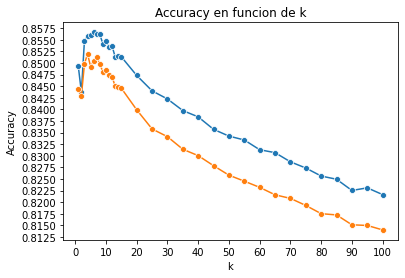

In [34]:
import seaborn as sns
from matplotlib import pyplot as plt
fig = sns.lineplot(data=df_knn_manhattan, x='k', y='accuracy', marker='o')
plt.gca().locator_params(nbins=20)
fig.set(xlabel='k', ylabel='Accuracy',title='Accuracy en funcion de k');
fig = sns.lineplot(data=df_knn_euclidean, x='k', y='accuracy', marker='o')
plt.gca().locator_params(nbins=20)
fig.set(xlabel='k', ylabel='Accuracy',title='Accuracy en funcion de k');

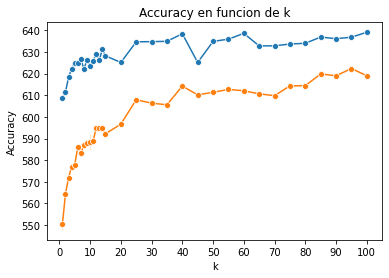

In [35]:
fig = sns.lineplot(data=df_validation_times_manhattan, x='k', y='time', marker='o')
plt.gca().locator_params(nbins=20)
fig.set(xlabel='k', ylabel='Accuracy',title='Accuracy en funcion de k');
fig = sns.lineplot(data=df_validation_times_euclidean, x='k', y='time', marker='o')
plt.gca().locator_params(nbins=20)
fig.set(xlabel='k', ylabel='Accuracy',title='Accuracy en funcion de k');

In [23]:
accs_knn_euclidean

[(20, 0.8397291666666667),
 (25, 0.8376250000000001),
 (30, 0.8329583333333334),
 (35, 0.8324374999999999),
 (40, 0.8297916666666666),
 (45, 0.8266249999999999),
 (50, 0.8257708333333333),
 (1, 0.8436041666666666),
 (6, 0.851125),
 (11, 0.8469166666666668),
 (16, 0.8442083333333334),
 (1, 0.843625),
 (6, 0.8503125),
 (11, 0.8463125),
 (16, 0.8438541666666666)]

# Experimento con la mitad de los datos de entrenamiento.

In [11]:
from sklearn.model_selection import KFold
import time

data_30mil = data[:30000]
X,y = data_30mil.drop(['label'], axis = 1), data_30mil['label']
X_train_30k, X_test_30k, y_train_30k, y_test_30k = train_test_split(X, y, test_size = 0.2, random_state = SEED)
kfold = KFold(n_splits=5, shuffle=True)

X_train_30k = X_train_30k.reset_index(drop=True)

y_train_30k.index = X_train_30k.index
performance_accuracy = []

fold_count = 1

In [12]:
accs_knn_manhattan = []
validation_times = []

performance_accuracy = []
pipe = Pipeline([('knn',KNeighborsClassifier(n_neighbors=1, p=1))])
for (train_index, test_index) in kfold.split(X_train_30k):
    print('fold '+str(fold_count)+': ')
    print('-- training --')
    X_kfold_train_30k, y_kfold_train_30k = X_train_30k.iloc[train_index], y_train_30k.loc[train_index]
    X_kfold_test_30k, y_kfold_test_30k = X_train_30k.iloc[test_index], y_train_30k.loc[test_index]
    start = time.time()
    pipe.fit(X_kfold_train_30k, y_kfold_train_30k)
    y_kfold_pred_30k = pipe.predict(X_kfold_test_30k)
    end = time.time()
    train_time = end-start
    print(train_time)
    print('-- train ok ! --')
    perf = accuracy_score(y_kfold_test_30k, y_kfold_pred_30k)
    performance_accuracy.append(perf)

    fold_count = fold_count + 1

for k in range(5, 51, 5): 
    performance_accuracy = []
    pipe = Pipeline([('knn',KNeighborsClassifier(n_neighbors=k, p=1))])
    for (train_index, test_index) in kfold.split(X_train_30k):
        print('fold '+str(fold_count)+': ')
        print('-- training --')
        X_kfold_train_30k, y_kfold_train_30k = X_train_30k.iloc[train_index], y_train_30k.loc[train_index]
        X_kfold_test_30k, y_kfold_test_30k = X_train_30k.iloc[test_index], y_train_30k.loc[test_index]
        start = time.time()
        pipe.fit(X_kfold_train_30k, y_kfold_train_30k)
        y_kfold_pred_30k = pipe.predict(X_kfold_test_30k)
        end = time.time()
        train_time = end-start
        print(train_time)
        print('-- train ok ! --')
        perf = accuracy_score(y_kfold_test_30k, y_kfold_pred_30k)
        performance_accuracy.append(perf)

        fold_count = fold_count + 1
    validation_times.append((k,np.mean(train_time)))
    accs_knn_manhattan.append((k,np.mean(performance_accuracy)))
    print(np.mean(performance_accuracy))
    

fold 1: 
-- training --
154.75428867340088
-- train ok ! --
fold 2: 
-- training --
155.84276127815247
-- train ok ! --
fold 3: 
-- training --
154.36296677589417
-- train ok ! --
fold 4: 
-- training --
155.18692278862
-- train ok ! --
fold 5: 
-- training --
154.40520930290222
-- train ok ! --
fold 6: 
-- training --
159.88154196739197
-- train ok ! --
fold 7: 
-- training --
156.86418795585632
-- train ok ! --
fold 8: 
-- training --
154.12760496139526
-- train ok ! --
fold 9: 
-- training --
155.12173199653625
-- train ok ! --
fold 10: 
-- training --
159.1857030391693
-- train ok ! --
0.8455416666666666
fold 11: 
-- training --
158.12714433670044
-- train ok ! --
fold 12: 
-- training --
158.27232789993286
-- train ok ! --
fold 13: 
-- training --
159.45046377182007
-- train ok ! --
fold 14: 
-- training --
159.24630689620972
-- train ok ! --
fold 15: 
-- training --
158.37516808509827
-- train ok ! --
0.8418749999999999
fold 16: 
-- training --
160.08305191993713
-- train ok ! --

In [13]:
for k in range(1, 20):
    performance_accuracy = []
    pipe = Pipeline([('knn',KNeighborsClassifier(n_neighbors=k, p=1))])
    for (train_index, test_index) in kfold.split(X_train_30k):
        print('fold '+str(fold_count)+': ')
        print('-- training --')
        X_kfold_train_30k, y_kfold_train_30k = X_train_30k.iloc[train_index], y_train_30k.loc[train_index]
        X_kfold_test_30k, y_kfold_test_30k = X_train_30k.iloc[test_index], y_train_30k.loc[test_index]
        start = time.time()
        pipe.fit(X_kfold_train_30k, y_kfold_train_30k)
        y_kfold_pred_30k = pipe.predict(X_kfold_test_30k)
        end = time.time()
        train_time = end-start
        print(train_time)
        print('-- train ok ! --')
        perf = accuracy_score(y_kfold_test_30k, y_kfold_pred_30k)
        performance_accuracy.append(perf)

        fold_count = fold_count + 1
    validation_times.append((k,np.mean(train_time)))
    accs_knn_manhattan.append((k,np.mean(performance_accuracy)))
    print(np.mean(performance_accuracy))

fold 56: 
-- training --
150.5924470424652
-- train ok ! --
fold 57: 
-- training --
154.5986852645874
-- train ok ! --
fold 58: 
-- training --
156.0656294822693
-- train ok ! --
fold 59: 
-- training --
156.06196546554565
-- train ok ! --
fold 60: 
-- training --
154.69167518615723
-- train ok ! --
0.8375833333333335
fold 61: 
-- training --
154.95829010009766
-- train ok ! --
fold 62: 
-- training --
155.89157390594482
-- train ok ! --
fold 63: 
-- training --
154.92463183403015
-- train ok ! --
fold 64: 
-- training --
151.51438856124878
-- train ok ! --
fold 65: 
-- training --
155.1416893005371
-- train ok ! --
0.833
fold 66: 
-- training --
157.20577454566956
-- train ok ! --
fold 67: 
-- training --
156.75193071365356
-- train ok ! --
fold 68: 
-- training --
157.49774646759033
-- train ok ! --
fold 69: 
-- training --
157.52874946594238
-- train ok ! --
fold 70: 
-- training --
153.39998292922974
-- train ok ! --
0.8441666666666668
fold 71: 
-- training --
154.8115656375885
--

In [15]:
accs_manhattan_30k = accs_knn_manhattan

In [24]:
df_knn_manhattan_30k = pd.DataFrame(accs_manhattan_30k, columns=['k', 'accuracy'])
df_knn_manhattan_30k.to_csv('results/data_knn_30k.csv', index=False)

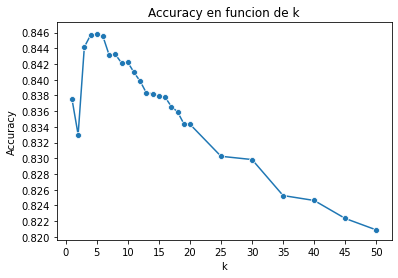

In [29]:

fig = sns.lineplot(data=df_knn_manhattan_30k, x='k', y='accuracy', marker='o')
plt.gca().locator_params(nbins=20)
fig.set(xlabel='k', ylabel='Accuracy',title='Accuracy en funcion de k');
plt.savefig("graficos/knn_manhattan_acc_50_30k.svg");

# PCA

In [4]:
X,y = data.drop(['label'], axis = 1), data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = SEED)
kfold = KFold(n_splits=5, shuffle=True)

X_train = X_train.reset_index(drop=True)

y_train.index = X_train.index
performance_accuracy = []

fold_count = 1

In [49]:
data

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)

(48000, 784)
(12000, 784)
(48000,)


In [51]:
X_train

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,11,37,6,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47995,0,0,0,0,0,3,7,0,0,0,...,174,180,196,235,0,0,255,229,166,0
47996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47997,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
47998,0,0,0,0,0,0,0,2,0,0,...,94,74,0,0,0,0,0,0,0,0


In [5]:
n=150

In [6]:
pca = PCA(n_components=n)

In [55]:
start = time.time()
pca.fit(X_train)
X_pca = pca.transform(X_train)
pca.transform(X_train)
end = time.time()
print(X_pca.shape)
print(end-start)

(48000, 150)
5.71228551864624


In [7]:
# con .explained_variance_ratio_ vemos la fracción de información que aporta cada componente
evr = pca.explained_variance_ratio_

# Graficamos la fracción de varianza que aporta cada componente
# y la información acumulada
fig, ax = plt.subplots(1, 2, figsize = (12, 4))

ax[0].plot(range(1, len(evr) + 1), evr, '-', linewidth = 2)
ax[0].set_ylabel('Fracción de varianza explicada')
ax[0].set_xlabel('Número de componentes principal')

# Calculamos el acumulado con la función cumsum de numpy 
varianza_acumulada = np.cumsum(evr)

ax[1].plot(range(1, len(evr) + 1), varianza_acumulada, '-', linewidth = 2)
ax[1].set_ylabel('Fracción acumulada de varianza explicada')
ax[1].set_xlabel('Cantidad de componentes principales')

AttributeError: 'PCA' object has no attribute 'explained_variance_ratio_'

In [23]:
X_pca.shape
y = data['label']
X_pca = pd.DataFrame(X_pca)

In [16]:
y.shape

(60000,)

In [5]:
accs_knn_manhattan_pca = []
validation_times_manhattan_pca = []
for k in range(5, 31, 5):
    for n in [5, 20, 30, 50, 70, 100, 130, 150]:
        start_transform = time.time()
        pca = PCA(n_components=n)
        pca.fit(X_train)
        X_train_pca = pca.transform(X_train)
        pca.transform(X_train)
        end_transform = time.time()
        X_train_pca = pd.DataFrame(X_train_pca)
        performance_accuracy = []
        pipe = Pipeline([('knn',KNeighborsClassifier(n_neighbors=k, p=1))])
        for (train_index, test_index) in kfold.split(X_train_pca):
            print('fold '+str(fold_count)+': ')
            print('-- training --')
            X_kfold_train_pca, y_kfold_train = X_train_pca.iloc[train_index], y_train.loc[train_index]
            X_kfold_test_pca, y_kfold_test = X_train_pca.iloc[test_index], y_train.loc[test_index]
            start = time.time()
            pipe.fit(X_kfold_train_pca, y_kfold_train)
            y_kfold_pred = pipe.predict(X_kfold_test_pca)
            end = time.time()
            train_time = end-start + end_transform - start_transform
            print(train_time)
            print('-- train ok ! --')
            perf = accuracy_score(y_kfold_test, y_kfold_pred)
            performance_accuracy.append(perf)

            fold_count = fold_count + 1
        validation_times_manhattan_pca.append((k,n,np.mean(train_time)))
        accs_knn_manhattan_pca.append((k,n,np.mean(performance_accuracy)))
        print(np.mean(performance_accuracy))

fold 1: 
-- training --
2.914703130722046
-- train ok ! --
fold 2: 
-- training --
2.900982141494751
-- train ok ! --
fold 3: 
-- training --
2.89567232131958
-- train ok ! --
fold 4: 
-- training --
2.899676561355591
-- train ok ! --
fold 5: 
-- training --
2.901074171066284
-- train ok ! --
0.7354999999999999
fold 6: 
-- training --
7.300988435745239
-- train ok ! --
fold 7: 
-- training --
7.409654140472412
-- train ok ! --
fold 8: 
-- training --
7.322641372680664
-- train ok ! --
fold 9: 
-- training --
7.421768665313721
-- train ok ! --
fold 10: 
-- training --
7.350833177566528
-- train ok ! --
0.8443333333333334
fold 11: 
-- training --
13.899157047271729
-- train ok ! --
fold 12: 
-- training --
14.246610641479492
-- train ok ! --
fold 13: 
-- training --
14.11925745010376
-- train ok ! --
fold 14: 
-- training --
14.144119262695312
-- train ok ! --
fold 15: 
-- training --
13.99708080291748
-- train ok ! --
0.8516250000000001
fold 16: 
-- training --
45.56426286697388
-- trai

8.758979082107544
-- train ok ! --
fold 130: 
-- training --
8.876681327819824
-- train ok ! --
0.8426041666666666
fold 131: 
-- training --
15.376794815063477
-- train ok ! --
fold 132: 
-- training --
15.529240846633911
-- train ok ! --
fold 133: 
-- training --
15.23164987564087
-- train ok ! --
fold 134: 
-- training --
15.771849870681763
-- train ok ! --
fold 135: 
-- training --
15.727764129638672
-- train ok ! --
0.8496875000000002
fold 136: 
-- training --
53.322253704071045
-- train ok ! --
fold 137: 
-- training --
52.43113112449646
-- train ok ! --
fold 138: 
-- training --
52.78441762924194
-- train ok ! --
fold 139: 
-- training --
51.86120939254761
-- train ok ! --
fold 140: 
-- training --
52.97868537902832
-- train ok ! --
0.8536041666666666
fold 141: 
-- training --
103.24718308448792
-- train ok ! --
fold 142: 
-- training --
101.39643263816833
-- train ok ! --
fold 143: 
-- training --
100.07583546638489
-- train ok ! --
fold 144: 
-- training --
106.28418707847595
-

In [7]:
accs_knn_manhattan_pca
validation_times_manhattan_pca

[(5, 5, 2.901074171066284),
 (5, 20, 7.350833177566528),
 (5, 30, 13.99708080291748),
 (5, 50, 43.11793231964111),
 (5, 70, 94.80449986457825),
 (5, 100, 143.10782408714294),
 (5, 130, 164.88271522521973),
 (5, 150, 176.55681133270264),
 (10, 5, 2.964526653289795),
 (10, 20, 7.883835792541504),
 (10, 30, 14.397613286972046),
 (10, 50, 47.837302684783936),
 (10, 70, 104.37132740020752),
 (10, 100, 151.47221779823303),
 (10, 130, 161.5721230506897),
 (10, 150, 187.36325550079346),
 (15, 5, 2.8965671062469482),
 (15, 20, 8.163418054580688),
 (15, 30, 14.768277645111084),
 (15, 50, 50.284064531326294),
 (15, 70, 104.50058436393738),
 (15, 100, 155.3297245502472),
 (15, 130, 175.18935656547546),
 (15, 150, 185.44593453407288),
 (20, 5, 3.1252033710479736),
 (20, 20, 8.876681327819824),
 (20, 30, 15.727764129638672),
 (20, 50, 52.97868537902832),
 (20, 70, 111.89839172363281),
 (20, 100, 157.9379711151123),
 (20, 130, 164.46412992477417),
 (20, 150, 179.97011423110962),
 (25, 5, 3.0992705821

In [17]:
df_knn_manhattan_pca = pd.DataFrame(accs_knn_manhattan_pca, columns=['k','componentes principales','accuracy'])
df_knn_manhattan_pca.to_csv('results/data_knn_manhattan_pca.csv', index=False)



In [10]:
accs_knn_euclidean_pca = []
validation_times_euclidean_pca = []
for k in range(5, 31, 5):
    for n in [5, 20, 30, 50, 70, 100, 130, 150]:
        start_transform = time.time()
        pca = PCA(n_components=n)
        pca.fit(X_train)
        X_train_pca = pca.transform(X_train)
        pca.transform(X_train)
        end_transform = time.time()
        X_train_pca = pd.DataFrame(X_train_pca)
        performance_accuracy = []
        pipe = Pipeline([('knn',KNeighborsClassifier(n_neighbors=k, p=2))])
        for (train_index, test_index) in kfold.split(X_train_pca):
            print('fold '+str(fold_count)+': ')
            print('-- training --')
            X_kfold_train_pca, y_kfold_train = X_train_pca.iloc[train_index], y_train.loc[train_index]
            X_kfold_test_pca, y_kfold_test = X_train_pca.iloc[test_index], y_train.loc[test_index]
            start = time.time()
            pipe.fit(X_kfold_train_pca, y_kfold_train)
            y_kfold_pred = pipe.predict(X_kfold_test_pca)
            end = time.time()
            train_time = end-start + end_transform - start_transform
            print(train_time)
            print('-- train ok ! --')
            perf = accuracy_score(y_kfold_test, y_kfold_pred)
            performance_accuracy.append(perf)

            fold_count = fold_count + 1
        validation_times_euclidean_pca.append((k,n,np.mean(train_time)))
        accs_knn_euclidean_pca.append((k,n,np.mean(performance_accuracy)))
        print(np.mean(performance_accuracy))

fold 241: 
-- training --
2.8472893238067627
-- train ok ! --
fold 242: 
-- training --
2.8702874183654785
-- train ok ! --
fold 243: 
-- training --
2.8694770336151123
-- train ok ! --
fold 244: 
-- training --
2.843780755996704
-- train ok ! --
fold 245: 
-- training --
2.803779363632202
-- train ok ! --
0.736625
fold 246: 
-- training --
5.17755651473999
-- train ok ! --
fold 247: 
-- training --
5.2147064208984375
-- train ok ! --
fold 248: 
-- training --
5.022188425064087
-- train ok ! --
fold 249: 
-- training --
4.953359603881836
-- train ok ! --
fold 250: 
-- training --
4.942146062850952
-- train ok ! --
0.843
fold 251: 
-- training --
6.412498950958252
-- train ok ! --
fold 252: 
-- training --
6.45081639289856
-- train ok ! --
fold 253: 
-- training --
6.296723127365112
-- train ok ! --
fold 254: 
-- training --
6.233080148696899
-- train ok ! --
fold 255: 
-- training --
6.249108552932739
-- train ok ! --
0.8509583333333334
fold 256: 
-- training --
11.10752534866333
-- tr

5.260538816452026
-- train ok ! --
fold 368: 
-- training --
5.224232912063599
-- train ok ! --
fold 369: 
-- training --
5.182076692581177
-- train ok ! --
fold 370: 
-- training --
5.1810243129730225
-- train ok ! --
0.8414791666666668
fold 371: 
-- training --
6.853325843811035
-- train ok ! --
fold 372: 
-- training --
7.2072179317474365
-- train ok ! --
fold 373: 
-- training --
6.954585790634155
-- train ok ! --
fold 374: 
-- training --
6.948232412338257
-- train ok ! --
fold 375: 
-- training --
7.01555061340332
-- train ok ! --
0.8476250000000001
fold 376: 
-- training --
13.870150089263916
-- train ok ! --
fold 377: 
-- training --
13.419175148010254
-- train ok ! --
fold 378: 
-- training --
13.170130252838135
-- train ok ! --
fold 379: 
-- training --
13.111849546432495
-- train ok ! --
fold 380: 
-- training --
13.038488864898682
-- train ok ! --
0.8515416666666666
fold 381: 
-- training --
21.5809326171875
-- train ok ! --
fold 382: 
-- training --
21.36501693725586
-- tr

In [13]:
df_knn_euclidean_pca = pd.DataFrame(accs_knn_euclidean_pca, columns=['k','componentes principales','accuracy'])
df_knn_euclidean_pca.to_csv('results/data_knn_euclidean_pca.csv', index=False)
df_knn_euclidean_pca

,k,componentes principales,accuracy
0,5,5,0.736625
1,5,20,0.843000
2,5,30,0.850958
3,5,50,0.856021
4,5,70,0.858417
5,5,100,0.857146
6,5,130,0.859792
7,5,150,0.858687
8,10,5,0.745875
9,10,20,0.844833


In [20]:
for k in range(1, 15):
    for n in [5, 20, 30, 50, 70, 100, 130, 150, 200]:
        start_transform = time.time()
        pca = PCA(n_components=n)
        pca.fit(X_train)
        X_train_pca = pca.transform(X_train)
        pca.transform(X_train)
        end_transform = time.time()
        X_train_pca = pd.DataFrame(X_train_pca)
        performance_accuracy = []
        pipe = Pipeline([('knn',KNeighborsClassifier(n_neighbors=k, p=1))])
        for (train_index, test_index) in kfold.split(X_train_pca):
            print('fold '+str(fold_count)+': ')
            print('-- training --')
            X_kfold_train_pca, y_kfold_train = X_train_pca.iloc[train_index], y_train.loc[train_index]
            X_kfold_test_pca, y_kfold_test = X_train_pca.iloc[test_index], y_train.loc[test_index]
            start = time.time()
            pipe.fit(X_kfold_train_pca, y_kfold_train)
            y_kfold_pred = pipe.predict(X_kfold_test_pca)
            end = time.time()
            train_time = end-start + end_transform - start_transform
            print(train_time)
            print('-- train ok ! --')
            perf = accuracy_score(y_kfold_test, y_kfold_pred)
            performance_accuracy.append(perf)

            fold_count = fold_count + 1
        validation_times_manhattan_pca.append((k,n,np.mean(train_time)))
        accs_knn_manhattan_pca.append((k,n,np.mean(performance_accuracy)))
        print(np.mean(performance_accuracy))

fold 481: 
-- training --
3.070502758026123
-- train ok ! --
fold 482: 
-- training --
3.1025028228759766
-- train ok ! --
fold 483: 
-- training --
3.092284917831421
-- train ok ! --
fold 484: 
-- training --
3.091824531555176
-- train ok ! --
fold 485: 
-- training --
3.0905966758728027
-- train ok ! --
0.6946666666666668
fold 486: 
-- training --
6.15043568611145
-- train ok ! --
fold 487: 
-- training --
6.437746047973633
-- train ok ! --
fold 488: 
-- training --
6.175350189208984
-- train ok ! --
fold 489: 
-- training --
6.2648093700408936
-- train ok ! --
fold 490: 
-- training --
6.138769149780273
-- train ok ! --
0.8245000000000001
fold 491: 
-- training --
10.426049709320068
-- train ok ! --
fold 492: 
-- training --
10.510246753692627
-- train ok ! --
fold 493: 
-- training --
10.434494256973267
-- train ok ! --
fold 494: 
-- training --
10.818878889083862
-- train ok ! --
fold 495: 
-- training --
10.602410554885864
-- train ok ! --
0.8342916666666665
fold 496: 
-- trainin

178.65300703048706
-- train ok ! --
fold 608: 
-- training --
177.891597032547
-- train ok ! --
fold 609: 
-- training --
176.41160106658936
-- train ok ! --
fold 610: 
-- training --
174.05706644058228
-- train ok ! --
0.861375
fold 611: 
-- training --
208.055114030838
-- train ok ! --
fold 612: 
-- training --
208.90649151802063
-- train ok ! --
fold 613: 
-- training --
208.6435067653656
-- train ok ! --
fold 614: 
-- training --
219.80918049812317
-- train ok ! --
fold 615: 
-- training --
219.07820105552673
-- train ok ! --
0.8587083333333334
fold 616: 
-- training --
2.843568801879883
-- train ok ! --
fold 617: 
-- training --
2.923926830291748
-- train ok ! --
fold 618: 
-- training --
2.923936605453491
-- train ok ! --
fold 619: 
-- training --
2.930628776550293
-- train ok ! --
fold 620: 
-- training --
2.9264423847198486
-- train ok ! --
0.7275208333333334
fold 621: 
-- training --
7.194141387939453
-- train ok ! --
fold 622: 
-- training --
7.263725280761719
-- train ok ! -

153.09867691993713
-- train ok ! --
fold 735: 
-- training --
146.26311612129211
-- train ok ! --
0.8641249999999999
fold 736: 
-- training --
166.77199912071228
-- train ok ! --
fold 737: 
-- training --
169.15910840034485
-- train ok ! --
fold 738: 
-- training --
161.6543152332306
-- train ok ! --
fold 739: 
-- training --
154.44434356689453
-- train ok ! --
fold 740: 
-- training --
155.95348286628723
-- train ok ! --
0.8642083333333334
fold 741: 
-- training --
169.48384857177734
-- train ok ! --
fold 742: 
-- training --
170.49312567710876
-- train ok ! --
fold 743: 
-- training --
169.33615899085999
-- train ok ! --
fold 744: 
-- training --
173.52944469451904
-- train ok ! --
fold 745: 
-- training --
183.80160474777222
-- train ok ! --
0.8634166666666667
fold 746: 
-- training --
211.6776990890503
-- train ok ! --
fold 747: 
-- training --
210.88516783714294
-- train ok ! --
fold 748: 
-- training --
209.95014357566833
-- train ok ! --
fold 749: 
-- training --
210.30523037910

44.1294367313385
-- train ok ! --
0.8581249999999999
fold 861: 
-- training --
96.09894919395447
-- train ok ! --
fold 862: 
-- training --
102.57143640518188
-- train ok ! --
fold 863: 
-- training --
103.52907490730286
-- train ok ! --
fold 864: 
-- training --
102.87722563743591
-- train ok ! --
fold 865: 
-- training --
101.92560648918152
-- train ok ! --
0.8609166666666667
fold 866: 
-- training --
149.08211421966553
-- train ok ! --
fold 867: 
-- training --
148.06838130950928
-- train ok ! --
fold 868: 
-- training --
149.9459707736969
-- train ok ! --
fold 869: 
-- training --
165.01996541023254
-- train ok ! --
fold 870: 
-- training --
151.5844964981079
-- train ok ! --
0.8626875
fold 871: 
-- training --
161.3347671031952
-- train ok ! --
fold 872: 
-- training --
170.43531322479248
-- train ok ! --
fold 873: 
-- training --
169.27884554862976
-- train ok ! --
fold 874: 
-- training --
170.7889380455017
-- train ok ! --
fold 875: 
-- training --
170.63199043273926
-- train o

fold 986: 
-- training --
14.21054482460022
-- train ok ! --
fold 987: 
-- training --
14.342503309249878
-- train ok ! --
fold 988: 
-- training --
14.248502731323242
-- train ok ! --
fold 989: 
-- training --
14.272944927215576
-- train ok ! --
fold 990: 
-- training --
14.469484329223633
-- train ok ! --
0.8526458333333334
fold 991: 
-- training --
49.12899303436279
-- train ok ! --
fold 992: 
-- training --
48.9180121421814
-- train ok ! --
fold 993: 
-- training --
48.401171922683716
-- train ok ! --
fold 994: 
-- training --
48.69291543960571
-- train ok ! --
fold 995: 
-- training --
48.48184394836426
-- train ok ! --
0.8575416666666668
fold 996: 
-- training --
104.48576331138611
-- train ok ! --
fold 997: 
-- training --
105.95638012886047
-- train ok ! --
fold 998: 
-- training --
105.63184022903442
-- train ok ! --
fold 999: 
-- training --
106.20039582252502
-- train ok ! --
fold 1000: 
-- training --
106.79834747314453
-- train ok ! --
0.8604166666666668
fold 1001: 
-- tra

In [21]:
for k in range(1, 15):
    for n in [5, 20, 30, 50, 70, 100, 130, 150, 200]:
        start_transform = time.time()
        pca = PCA(n_components=n)
        pca.fit(X_train)
        X_train_pca = pca.transform(X_train)
        pca.transform(X_train)
        end_transform = time.time()
        X_train_pca = pd.DataFrame(X_train_pca)
        performance_accuracy = []
        pipe = Pipeline([('knn',KNeighborsClassifier(n_neighbors=k, p=2))])
        for (train_index, test_index) in kfold.split(X_train_pca):
            print('fold '+str(fold_count)+': ')
            print('-- training --')
            X_kfold_train_pca, y_kfold_train = X_train_pca.iloc[train_index], y_train.loc[train_index]
            X_kfold_test_pca, y_kfold_test = X_train_pca.iloc[test_index], y_train.loc[test_index]
            start = time.time()
            pipe.fit(X_kfold_train_pca, y_kfold_train)
            y_kfold_pred = pipe.predict(X_kfold_test_pca)
            end = time.time()
            train_time = end-start + end_transform - start_transform
            print(train_time)
            print('-- train ok ! --')
            perf = accuracy_score(y_kfold_test, y_kfold_pred)
            performance_accuracy.append(perf)

            fold_count = fold_count + 1
        validation_times_euclidean_pca.append((k,n,np.mean(train_time)))
        accs_knn_euclidean_pca.append((k,n,np.mean(performance_accuracy)))
        print(np.mean(performance_accuracy))

fold 1111: 
-- training --
2.5098018646240234
-- train ok ! --
fold 1112: 
-- training --
2.555839776992798
-- train ok ! --
fold 1113: 
-- training --
2.5824224948883057
-- train ok ! --
fold 1114: 
-- training --
2.537692070007324
-- train ok ! --
fold 1115: 
-- training --
2.5881481170654297
-- train ok ! --
0.6955208333333334
fold 1116: 
-- training --
4.302845001220703
-- train ok ! --
fold 1117: 
-- training --
4.458846807479858
-- train ok ! --
fold 1118: 
-- training --
4.4652509689331055
-- train ok ! --
fold 1119: 
-- training --
4.465671539306641
-- train ok ! --
fold 1120: 
-- training --
4.4617133140563965
-- train ok ! --
0.8214583333333334
fold 1121: 
-- training --
5.241373062133789
-- train ok ! --
fold 1122: 
-- training --
5.457489728927612
-- train ok ! --
fold 1123: 
-- training --
5.445727586746216
-- train ok ! --
fold 1124: 
-- training --
5.431725740432739
-- train ok ! --
fold 1125: 
-- training --
5.4181599617004395
-- train ok ! --
0.8329583333333334
fold 11

30.7839252948761
-- train ok ! --
0.8567916666666665
fold 1236: 
-- training --
33.17346382141113
-- train ok ! --
fold 1237: 
-- training --
33.03625845909119
-- train ok ! --
fold 1238: 
-- training --
32.81373405456543
-- train ok ! --
fold 1239: 
-- training --
32.67842221260071
-- train ok ! --
fold 1240: 
-- training --
32.80339574813843
-- train ok ! --
0.8557708333333334
fold 1241: 
-- training --
45.88925313949585
-- train ok ! --
fold 1242: 
-- training --
45.928478956222534
-- train ok ! --
fold 1243: 
-- training --
45.483561992645264
-- train ok ! --
fold 1244: 
-- training --
44.63035321235657
-- train ok ! --
fold 1245: 
-- training --
43.02883744239807
-- train ok ! --
0.8564791666666667
fold 1246: 
-- training --
2.8989458084106445
-- train ok ! --
fold 1247: 
-- training --
2.8661065101623535
-- train ok ! --
fold 1248: 
-- training --
2.863302230834961
-- train ok ! --
fold 1249: 
-- training --
2.862736463546753
-- train ok ! --
fold 1250: 
-- training --
2.86480212

19.87670922279358
-- train ok ! --
0.8581666666666667
fold 1361: 
-- training --
27.275864839553833
-- train ok ! --
fold 1362: 
-- training --
29.25928807258606
-- train ok ! --
fold 1363: 
-- training --
27.17627716064453
-- train ok ! --
fold 1364: 
-- training --
28.7270827293396
-- train ok ! --
fold 1365: 
-- training --
26.984129905700684
-- train ok ! --
0.8604583333333334
fold 1366: 
-- training --
33.67358446121216
-- train ok ! --
fold 1367: 
-- training --
33.15258049964905
-- train ok ! --
fold 1368: 
-- training --
33.43112802505493
-- train ok ! --
fold 1369: 
-- training --
33.40131950378418
-- train ok ! --
fold 1370: 
-- training --
33.87045454978943
-- train ok ! --
0.8598958333333334
fold 1371: 
-- training --
35.63088130950928
-- train ok ! --
fold 1372: 
-- training --
35.78765320777893
-- train ok ! --
fold 1373: 
-- training --
35.28521943092346
-- train ok ! --
fold 1374: 
-- training --
35.82780981063843
-- train ok ! --
fold 1375: 
-- training --
35.216619014

6.3884899616241455
-- train ok ! --
0.8513958333333334
fold 1486: 
-- training --
11.502240180969238
-- train ok ! --
fold 1487: 
-- training --
11.462939977645874
-- train ok ! --
fold 1488: 
-- training --
11.61156678199768
-- train ok ! --
fold 1489: 
-- training --
11.397571563720703
-- train ok ! --
fold 1490: 
-- training --
11.442030668258667
-- train ok ! --
0.8559166666666667
fold 1491: 
-- training --
19.813299417495728
-- train ok ! --
fold 1492: 
-- training --
20.62045192718506
-- train ok ! --
fold 1493: 
-- training --
20.923282384872437
-- train ok ! --
fold 1494: 
-- training --
19.739583730697632
-- train ok ! --
fold 1495: 
-- training --
19.57942509651184
-- train ok ! --
0.8570625000000002
fold 1496: 
-- training --
28.738182544708252
-- train ok ! --
fold 1497: 
-- training --
28.1728036403656
-- train ok ! --
fold 1498: 
-- training --
28.720978498458862
-- train ok ! --
fold 1499: 
-- training --
28.149068355560303
-- train ok ! --
fold 1500: 
-- training --
28.

2.6358211040496826
-- train ok ! --
0.7490625
fold 1611: 
-- training --
4.87616229057312
-- train ok ! --
fold 1612: 
-- training --
4.992298603057861
-- train ok ! --
fold 1613: 
-- training --
4.861636161804199
-- train ok ! --
fold 1614: 
-- training --
4.815596103668213
-- train ok ! --
fold 1615: 
-- training --
4.801753997802734
-- train ok ! --
0.8443333333333334
fold 1616: 
-- training --
6.372837543487549
-- train ok ! --
fold 1617: 
-- training --
6.478344202041626
-- train ok ! --
fold 1618: 
-- training --
6.334886074066162
-- train ok ! --
fold 1619: 
-- training --
6.28258204460144
-- train ok ! --
fold 1620: 
-- training --
6.3346734046936035
-- train ok ! --
0.8505416666666665
fold 1621: 
-- training --
12.255043745040894
-- train ok ! --
fold 1622: 
-- training --
11.914133071899414
-- train ok ! --
fold 1623: 
-- training --
11.979498147964478
-- train ok ! --
fold 1624: 
-- training --
11.699313640594482
-- train ok ! --
fold 1625: 
-- training --
11.772783994674683

41.695725440979004
-- train ok ! --
0.8549791666666667
fold 1736: 
-- training --
53.99653506278992
-- train ok ! --
fold 1737: 
-- training --
53.78936004638672
-- train ok ! --
fold 1738: 
-- training --
52.15015435218811
-- train ok ! --
fold 1739: 
-- training --
52.418556451797485
-- train ok ! --
fold 1740: 
-- training --
54.94852948188782
-- train ok ! --
0.8551041666666667


In [22]:
times_knn_manhattan_pca = pd.DataFrame(validation_times_manhattan_pca, columns=['k','componentes principales','time'])
times_knn_manhattan_pca.to_csv('results/times_knn_manhattan_pca.csv', index=False)
times_knn_euclidean_pca = pd.DataFrame(validation_times_euclidean_pca, columns=['k','componentes principales','time'])
times_knn_euclidean_pca.to_csv('results/times_knn_euclidean_pca.csv', index=False)
times_knn_euclidean_pca

,k,componentes principales,time
0,5,5,2.803779
1,5,20,4.942146
2,5,30,6.249109
3,5,50,11.781786
4,5,70,18.352786
...,...,...,...
169,14,70,21.970397
170,14,100,30.586907
171,14,130,36.006842
172,14,150,41.695725


# Transformaciones no lineales

In [100]:
from sklearn.manifold import TSNE
from sklearn.decomposition import KernelPCA

In [4]:
X,y = data.drop(['label'], axis = 1), data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = SEED)
kfold = KFold(n_splits=5, shuffle=True)

X_train = X_train.reset_index(drop=True)

y_train.index = X_train.index
performance_accuracy = []

fold_count = 1

In [77]:
n=100

In [78]:
pca = PCA(n_components=n)

In [79]:
start = time.time()
pca.fit(X_train)
X_pca = pca.transform(X_train)
pca.transform(X_train)
end = time.time()
print(X_pca.shape)
print(end-start)

(48000, 100)
4.977585554122925


In [80]:
X_pca = X_pca.astype(np.float64)

In [81]:
X_pca.type()

AttributeError: 'numpy.ndarray' object has no attribute 'type'

In [84]:
X_pca_tsne = TSNE(n_components=3).fit_transform(X_pca)

In [85]:
X_pca_tsne.shape

(48000, 3)

In [86]:
X_pca_tsne = pd.DataFrame(X_pca_tsne)

In [98]:
performance_accuracy = []
pipe = Pipeline([('knn',KNeighborsClassifier(n_neighbors=10, p=1))])
for (train_index, test_index) in kfold.split(X_pca_tsne):
    print('fold '+str(fold_count)+': ')
    print('-- training --')
    X_kfold_train, y_kfold_train = X_pca_tsne.iloc[train_index], y_train.loc[train_index]
    X_kfold_test, y_kfold_test = X_pca_tsne.iloc[test_index], y_train.loc[test_index]
    start = time.time()
    pipe.fit(X_kfold_train, y_kfold_train)
    y_kfold_pred = pipe.predict(X_kfold_test)
    end = time.time()
    train_time = end-start
    print(train_time)
    print('-- train ok ! --')
    perf = accuracy_score(y_kfold_test, y_kfold_pred)
    performance_accuracy.append(perf)

    fold_count = fold_count + 1
print(np.mean(performance_accuracy))

fold 56: 
-- training --
0.6754734516143799
-- train ok ! --
fold 57: 
-- training --
0.6925036907196045
-- train ok ! --
fold 58: 
-- training --
0.6824872493743896
-- train ok ! --
fold 59: 
-- training --
0.6723136901855469
-- train ok ! --
fold 60: 
-- training --
0.6882717609405518
-- train ok ! --
0.84275


In [5]:
kernel_pca = KernelPCA(n_components=7, kernel='linear')

In [ ]:
X_kernel_pca  = kernel_pca.fit_transform(X_train)